In [ ]:
# Install TextBlob (only once in Colab)
!pip install textblob
!pip install vaderSentiment

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

# Read CSV
df = pd.read_csv("sample_student_feedback.csv")  # replace with your file name
df.head()

Saving sample_student_feedback.csv to sample_student_feedback.csv


,Event Name,Rating,Feedback Comment
0,Data Science Workshop,5,Very informative and engaging!
1,AI Seminar,4,Good content but could be more interactive.
2,Hackathon,3,Too long and a bit boring in the middle.
3,AI Seminar,2,Not very clear explanations.
4,Cybersecurity Talk,5,"Excellent session, learned a lot."


In [ ]:
# Drop empty feedback rows
df.dropna(subset=["Feedback Comment"], inplace=True)

# Rename columns for easy access
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


event_name
Cybersecurity Talk       4.500000
AI Seminar               3.666667
Data Science Workshop    3.333333
Hackathon                3.000000
Name: rating, dtype: float64


/tmp/ipython-input-3860856053.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=df, palette="viridis")


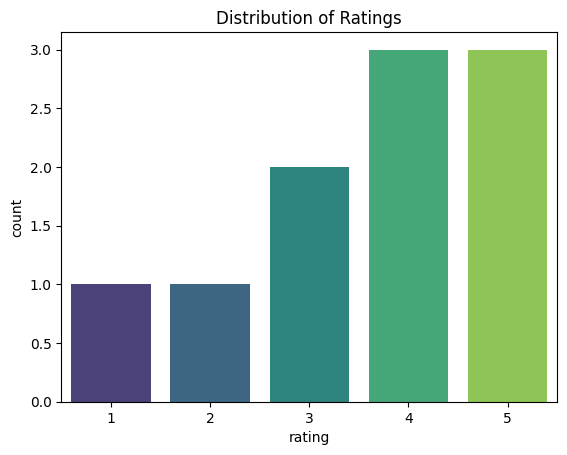

In [ ]:
# Average rating per event
avg_ratings = df.groupby("event_name")["rating"].mean().sort_values(ascending=False)
print(avg_ratings)

# Plot distribution of ratings
sns.countplot(x="rating", data=df, palette="viridis")
plt.title("Distribution of Ratings")
plt.show()


In [ ]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)["compound"]
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["feedback_comment"].apply(get_sentiment)
df["sentiment"].value_counts()


,count
sentiment,
Positive,7
Negative,3


/tmp/ipython-input-295715659.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df, palette="coolwarm")


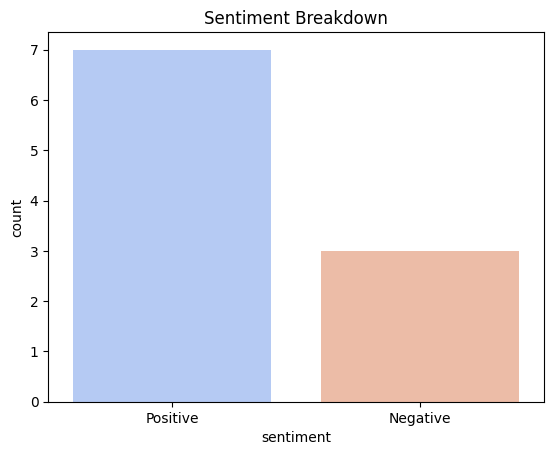

In [ ]:
sns.countplot(x="sentiment", data=df, palette="coolwarm")
plt.title("Sentiment Breakdown")
plt.show()


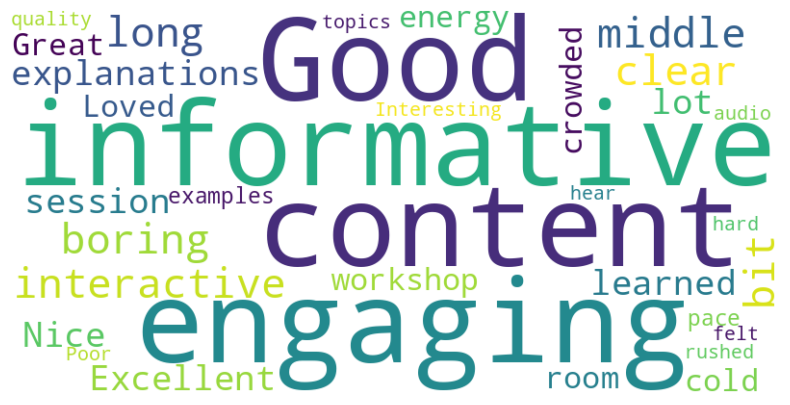

In [ ]:
all_text = " ".join(df["feedback_comment"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
top_events = avg_ratings.head(3)
print("Top 3 Events:\n", top_events)


Top 3 Events:
 event_name
Cybersecurity Talk       4.500000
AI Seminar               3.666667
Data Science Workshop    3.333333
Name: rating, dtype: float64


In [ ]:
%ls /content


 sample_data/                 'student_feedback_dashboard (1).pdf'
 sample_student_feedback.csv   student_feedback_dashboard.pdf
